# Introducción a la Programación para Ciencia de Datos
## Lenguaje de programación R
_Rocío Romero Zaliz_ - rocio@decsai.ugr.es

# Estructuras de programación

* R es un lenguaje estructurado en bloques (como C, C++, Python, Perl, etc.).
* Los bloques están delimitados por llaves, mientras que las sentencias están separadas por caracteres de nueva línea u, opcionalmente, por punto y coma.
* Al igual que con muchos lenguajes de scripting, no "declaramos" variables en R, por lo tanto tenemos que tener cuidado con los posibles problemas de alcance de variables.

## Operadores básicos de R
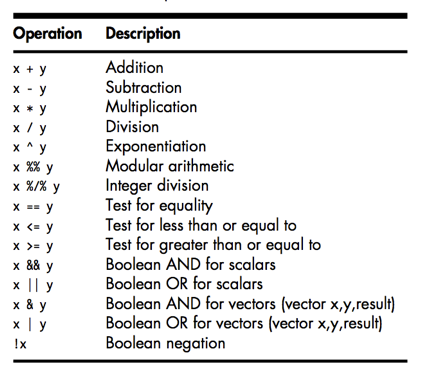

## Sentencias de control: if-else

La sintaxis para if-else es la siguiente:

><pre>if (r == 4) {  
     x <- 1  
 } else {  
     x <- 3  
     y <- 4 
 }
</pre>

In [1]:
r <- 3
x <- 0
y <- 0

if (r == 4) {  
 x <- 1  
} else {  
 x <- 3  
 y <- 4 
}

print(x)
print(y)

[1] 3
[1] 4


Una sentencia if-else funciona como una llamada a una función, y como tal, devuelve el último valor asignado.

In [2]:
print(if (x == 2) y <- x else y <- x+1)

[1] 4


In [3]:
y <- if(x == 2) x else x+1 # Recomendación: esta es la forma más elegante... usad esta porfaplis
y

[1] 4

In [4]:
# Error!
x <- 1:10
y <- if (x == 2) x else x+1
y

ERROR: Error in if (x == 2) x else x + 1: the condition has length > 1


In [8]:
x == 2

[1] FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Cuando trabajamos con vectores, utilizamo la función `ifelse`.

La forma es: `ifelse(b,u,v)` donde `b` es un vector booleano, y `u` y `v` son vectores.

El valor de retorno es a su vez un vector: el elemento `i` es `u[i]` si `b[i]` es verdadero, o `v[i]` si `b[i]` es falso.

In [9]:
x <- 1:10
y <- ifelse(x == 2, x, x+1)
y

[1]  2  2  4  5  6  7  8  9 10 11

In [10]:
x <- 1:10
ifelse(x %% 2 == 0, "par", "impar")

[1] "impar" "par"   "impar" "par"   "impar" "par"   "impar" "par"   "impar"
[10] "par"

In [11]:
x <- c(5,2,9,12)
ifelse(x > 6, 2*x, 3*x)

[1] 15  6 18 24

## Declaraciones de control: ciclos

Uno de los temas principales de la programación en R es evitar los ciclos si es posible; si no, mantener los ciclos lo más simple posible.

Tenemos:
* Ciclos For
* Ciclos While
* Ciclos de repetición

### For loops

In [12]:
# Sólo un ejemplo, por favor no codifiques así en R... Por faaaaaaaa... :'(
for (n in 1:5) print(n) 

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [13]:
# In R use print(1:5)
print(1:5)

[1] 1 2 3 4 5


In [14]:
# Sólo un ejemplo, por favor no codifiques así en R... Por faaaaaaaa...
print(x)

k <- 0
for (n in x) {
   if (n %% 2 == 1) k <- k+1  
} 
k

[1]  5  2  9 12


[1] 2

In [15]:
# In R use...
sum(x %% 2 == 1)

[1] 2

In [16]:
# He aquí el porque...
k <- 0
x <- 1:10000000
system.time(for (n in x) if (n %% 2 == 1) k <- k+1)
system.time(sum(x %% 2 == 1))

   user  system elapsed 
  2.062   0.019   2.092 

   user  system elapsed 
  0.320   0.058   0.388 

### While loops

In [19]:
# Sólo un ejemplo, por favor no codifiques así en R... Por faaaaaaaa...
print(x[1:10])

i <- 1
while ((i < length(x)) && (x[i] != 9)) {
    i <- i+1
}
i

 [1]  1  2  3  4  5  6  7  8  9 10


[1] 9

In [22]:
# In R use...
which(x == 9)

[1] 9

In [25]:
# He aquí el porque...
i <- 1
x <- 1:1000000
system.time(while ((i < length(x)) && (x[i] != 999999)) i <- i+1)
system.time(which(x == 999999))

   user  system elapsed 
  0.166   0.003   0.173 

   user  system elapsed 
  0.003   0.001   0.004 

### Repeat loops

In [27]:
# Sólo un ejemplo, por favor no codifiquéis así en R...
# Honestamente odio los repeats en R... Odio el `break` en cualquier lenguaje de programación
# Llamadme "negacionista del break"

i <- 1
repeat {
    i <- i+1
    if ((i > length(x)) || (x[i] == 9)) break
}
i 

[1] 9

In [28]:
# In R use...
which(x == 9)

[1] 9

In [30]:
# This is why:
i <- 1
x <- 1:100000
system.time(repeat {
    i <- i+1
    if ((i > length(x)) || (x[i] == 99999)) break
    })
system.time(which(x == 99999)[1])

   user  system elapsed 
  0.034   0.000   0.035 

   user  system elapsed 
  0.000   0.001   0.001 

### Looping: the R way

En R tienes más opciones a la hora de hacer cálculos de repetición:

![Apply](applies.png)

#### La función apply

Esta es la forma general de apply para matrices: 

`apply(m, dimcode, f, fargs)` 

donde:
* `m` es la matriz. 
* Dimcode` es la dimensión, igual a 1 si la función se aplica a las filas o a 2 si se aplica a las columnas.
* f` es la función a aplicar. 
* `fargs` es un conjunto opcional de argumentos a suministrar a `f`. 

In [31]:
z <- matrix(c(1,1,2,2,3,3), nrow=3, byrow=TRUE)
z

1,1
2,2
3,3


In [32]:
apply(z, 1, mean)

[1] 1 2 3

In [35]:
apply(z, 1, mean, na.rm = TRUE)

[1] 1 2 3

In [36]:
apply(z, 2, mean)

[1] 2 2

In [37]:
apply(z, 1:2, mean)

1,1
2,2
3,3


In [38]:
apply(z, 1, function(x) x ^ 2)

1,4,9
1,4,9


#### La función lapply

Devuelve una lista de la misma longitud que los datos de entrada X, cada uno de cuyos elementos es el resultado de aplicar una función al elemento correspondiente de X.

In [39]:
w <- list(vector=c(1,2,3), matriz=matrix(1,nrow=2,ncol=2))
w

1,1
1,1


In [40]:
lapply(w, mean)

$vector
[1] 2

$matriz
[1] 1

In [41]:
suma <- function(x = 1, y = 5) {
    x + y
}

In [42]:
lapply(1:10, suma, x = 2)

[[1]]
[1] 3

[[2]]
[1] 4

[[3]]
[1] 5

[[4]]
[1] 6

[[5]]
[1] 7

[[6]]
[1] 8

[[7]]
[1] 9

[[8]]
[1] 10

[[9]]
[1] 11

[[10]]
[1] 12

In [43]:
lapply

function (X, FUN, ...) 
{
    FUN <- match.fun(FUN)
    if (!is.vector(X) || is.object(X)) 
        X <- as.list(X)
    .Internal(lapply(X, FUN))
}
<bytecode: 0x7fdeb5866328>
<environment: namespace:base>

#### La función sapply

Se aplica sobre un objeto y devuelve un objeto simplificado (un vector) si es posible.

In [44]:
z

1,1
2,2
3,3


In [45]:
out1 <- lapply(z, mean)
out1

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 3

[[4]]
[1] 1

[[5]]
[1] 2

[[6]]
[1] 3

In [46]:
out <- sapply(z, mean)
out

[1] 1 2 3 1 2 3

In [47]:
?sapply

lapply {base},R Documentation
X,a vector (atomic or list) or an expression object. Other objects (including classed objects) will be coerced by base::as.list.
FUN,"the function to be applied to each element of X: see ‘Details’. In the case of functions like +, %*%, the function name must be backquoted or quoted."
...,optional arguments to FUN.
simplify,"logical or character string; should the result be simplified to a vector, matrix or higher dimensional array if possible? For sapply it must be named and not abbreviated. The default value, TRUE, returns a vector or matrix if appropriate, whereas if simplify = ""array"" the result may be an array of “rank” (=length(dim(.))) one higher than the result of FUN(X[[i]])."
USE.NAMES,"logical; if TRUE and if X is character, use X as names for the result unless it had names already. Since this argument follows ... its name cannot be abbreviated."
FUN.VALUE,a (generalized) vector; a template for the return value from FUN. See ‘Details’.
n,integer: the number of replications.
expr,"the expression (a language object, usually a call) to evaluate repeatedly."
x,"a list, typically returned from lapply()."
higher,"logical; if true, simplify2array() will produce a (“higher rank”) array when appropriate, whereas higher = FALSE would return a matrix (or vector) only. These two cases correspond to sapply(*, simplify = ""array"") or simplify = TRUE, respectively."


In [48]:
out <- unlist(lapply(z, mean))
print(out)
class(out)

[1] 1 2 3 1 2 3


[1] "numeric"

In [49]:
df1 <- data.frame(uno=1:4, dos=c("hola", "mundo", "muy", "cruel"))
df1

uno,dos
<int>,<chr>
1,hola
2,mundo
3,muy
4,cruel


In [50]:
apply(df1, 1, mean)

Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”


[1] NA NA NA NA

In [51]:
apply(df1, 2, mean)

Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”


uno dos 
 NA  NA

In [52]:
apply(df1, 1:2, mean)

Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”


uno,dos
NA,NA
NA,NA
NA,NA
NA,NA


In [53]:
df1

uno,dos
<int>,<chr>
1,hola
2,mundo
3,muy
4,cruel


In [54]:
as.list(df1)

$uno
[1] 1 2 3 4

$dos
[1] "hola"  "mundo" "muy"   "cruel"

In [55]:
lapply(df1, mean)

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


$uno
[1] 2.5

$dos
[1] NA

# Mejora del rendimiento: velocidad y memoria

* Para tener un programa que funcione rápido, puede que necesites utilizar más espacio de memoria.
* Por otro lado, para conservar espacio de memoria, puede que tenga que conformarse con un código más lento.
* R es un lenguaje interpretado.
* Muchos de los comandos están escritos en C y por lo tanto se ejecutan en código máquina rápido. Pero otros comandos, y su propio código R, son R puro y por lo tanto interpretado.
* Todos los objetos de una sesión de R se almacenan en memoria.
* Más precisamente, todos los objetos se almacenan en el espacio de direcciones de memoria de R.
* Optimice su código R a través de la vectorización, el uso de la compilación byte-code y otros enfoques. 
* Escriba las partes clave, intensivas en CPU, de su código en un lenguaje compilado como C/C++.
* Escriba su código en alguna forma de R paralelo. 

## Vectorización

### Ciclos:
 * Es importante entender que simplemente reescribir el código para evitar bucles no necesariamente hará que el código sea más rápido.
 * Sin embargo, en algunos casos, se puede conseguir un aumento drástico de la velocidad, normalmente a través de la vectorización. 
 
Compare estas dos líneas de código:

> `for (i in 1:length(x)) z[i] <- x[i] + y[i]`

vs.

> `z <- x + y `

In [56]:
x <- runif(1000000)
y <- runif(1000000)
z <- vector(length=1000000)
system.time(for (i in 1:length(x)) z[i] <- x[i] + y[i])

   user  system elapsed 
  0.071   0.004   0.075 

In [57]:
system.time(z <- x + y)

   user  system elapsed 
  0.002   0.002   0.005 

* Ejemplos de otras funciones vectorizadas que pueden acelerar el código son `ifelse()`, `which()`, `any()`, `all()`, `cumsum()`, y `cumprod()`.
* En el caso de matrices, puede utilizar `rowSums()`, `colSums()`, etc.
* En configuraciones del tipo "todas las combinaciones posibles", `combn()`, `outer()`, `lower.tri()`, `upper.tri()`, o `expand.grid()` pueden ser justo lo que necesitas. 
* Aunque `apply()` elimina un bucle explícito, en realidad está implementada en R en lugar de en C, por lo que normalmente no acelerará su código. Sin embargo, las otras funciones apply, como `lapply()`, pueden ser muy útiles para acelerar su código. 

## Mejora del rendimiento

<b>Ejemplo 1</b>: Algoritmo lento en R

In [58]:
xs <- runif(10000)
print(xs)
res <- c()

# This is slow!
system.time(for (x in xs) res <- c(res, sqrt(x)))

    [1] 3.829825e-01 2.257327e-02 6.835879e-02 2.538723e-01 9.516119e-01
    [6] 8.959591e-01 4.554948e-01 8.611417e-01 5.901872e-01 3.062667e-01
   [11] 3.983772e-01 2.612607e-01 2.739539e-02 2.722184e-01 9.441491e-01
   [16] 5.145166e-01 5.212934e-01 6.806548e-01 4.699943e-01 6.930907e-01
   [21] 3.849111e-01 5.453224e-01 4.697578e-01 9.381422e-02 6.235475e-02
   [26] 6.707958e-01 3.090461e-01 2.611788e-01 1.056212e-01 1.627958e-01
   [31] 7.674612e-01 3.601303e-01 9.584115e-01 5.802426e-01 9.746086e-01
   [36] 5.483205e-01 4.306760e-01 3.683064e-01 2.239197e-01 8.332120e-01
   [41] 3.204897e-01 7.624827e-01 5.542051e-02 2.264688e-01 7.506435e-01
   [46] 8.844749e-01 2.274799e-01 6.854204e-01 9.226953e-01 5.011308e-01
   [51] 7.493271e-01 2.763130e-01 3.943580e-01 2.592771e-01 6.444949e-01
   [56] 9.498864e-01 7.910124e-02 6.737878e-01 9.167527e-01 6.220426e-02
   [61] 2.581271e-03 3.005338e-01 7.474848e-01 4.620148e-01 1.364846e-01
   [66] 8.812499e-01 5.187057e-01 9.108653e-01 1.15

   user  system elapsed 
  0.201   0.149   0.363 

<b>Ejemplo 1</b>: Algoritmo rápido en R

In [60]:
res <- numeric(length(xs))

system.time(for (i in seq_along(xs)) res[i] <- sqrt(xs[i]))

   user  system elapsed 
  0.008   0.001   0.009 

In [61]:
seq_along(xs)

[1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    20    21    22    23    24
   [25]    25    26    27    28    29    30    31    32    33    34    35    36
   [37]    37    38    39    40    41    42    43    44    45    46    47    48
   [49]    49    50    51    52    53    54    55    56    57    58    59    60
   [61]    61    62    63    64    65    66    67    68    69    70    71    72
   [73]    73    74    75    76    77    78    79    80    81    82    83    84
   [85]    85    86    87    88    89    90    91    92    93    94    95    96
   [97]    97    98    99   100   101   102   103   104   105   106   107   108
  [109]   109   110   111   112   113   114   115   116   117   118   119   120
  [121]   121   122   123   124   125   126   127   128   129   130   131   132
  [133]   133   134   135   136   137   138   139   140   141   142   143   144
  [145]   145   146   147   148   149   150   151   152   153   154   155   156
  [157]   157   158   159   160   161   162   163   164   165   166   167   168
  [169]   169   170   171   172   173   174   175   176   177   178   179   180
  [181]   181   182   183   184   185   186   187   188   189   190   191   192
  [193]   193   194   195   196   197   198   199   200   201   202   203   204
  [205]   205   206   207   208   209   210   211   212   213   214   215   216
  [217]   217   218   219   220   221   222   223   224   225   226   227   228
  [229]   229   230   231   232   233   234   235   236   237   238   239   240
  [241]   241   242   243   244   245   246   247   248   249   250   251   252
  [253]   253   254   255   256   257   258   259   260   261   262   263   264
  [265]   265   266   267   268   269   270   271   272   273   274   275   276
  [277]   277   278   279   280   281   282   283   284   285   286   287   288
  [289]   289   290   291   292   293   294   295   296   297   298   299   300
  [301]   301   302   303   304   305   306   307   308   309   310   311   312
  [313]   313   314   315   316   317   318   319   320   321   322   323   324
  [325]   325   326   327   328   329   330   331   332   333   334   335   336
  [337]   337   338   339   340   341   342   343   344   345   346   347   348
  [349]   349   350   351   352   353   354   355   356   357   358   359   360
  [361]   361   362   363   364   365   366   367   368   369   370   371   372
  [373]   373   374   375   376   377   378   379   380   381   382   383   384
  [385]   385   386   387   388   389   390   391   392   393   394   395   396
  [397]   397   398   399   400   401   402   403   404   405   406   407   408
  [409]   409   410   411   412   413   414   415   416   417   418   419   420
  [421]   421   422   423   424   425   426   427   428   429   430   431   432
  [433]   433   434   435   436   437   438   439   440   441   442   443   444
  [445]   445   446   447   448   449   450   451   452   453   454   455   456
  [457]   457   458   459   460   461   462   463   464   465   466   467   468
  [469]   469   470   471   472   473   474   475   476   477   478   479   480
  [481]   481   482   483   484   485   486   487   488   489   490   491   492
  [493]   493   494   495   496   497   498   499   500   501   502   503   504
  [505]   505   506   507   508   509   510   511   512   513   514   515   516
  [517]   517   518   519   520   521   522   523   524   525   526   527   528
  [529]   529   530   531   532   533   534   535   536   537   538   539   540
  [541]   541   542   543   544   545   546   547   548   549   550   551   552
  [553]   553   554   555   556   557   558   559   560   561   562   563   564
  [565]   565   566   567   568   569   570   571   572   573   574   575   576
  [577]   577   578   579   580   581   582   583   584   585   586   587   588
  [589]   589   590   591   592   593   594   595   596   597   598   599   600
  [6

<b>Ejemplo 2</b>: Algoritmo lento en R

In [63]:
amat <- matrix(1:20, nrow=4)
bmat <- matrix(NA, nrow(amat)/2, ncol(amat))

print(amat)
print(bmat)

system.time(for(i in 1:nrow(bmat)) bmat[i,] <- amat[2*i-1,] * amat[2*i,])
            
print(bmat)

     [,1] [,2] [,3] [,4] [,5]
[1,]    1    5    9   13   17
[2,]    2    6   10   14   18
[3,]    3    7   11   15   19
[4,]    4    8   12   16   20
     [,1] [,2] [,3] [,4] [,5]
[1,]   NA   NA   NA   NA   NA
[2,]   NA   NA   NA   NA   NA


   user  system elapsed 
  0.015   0.001   0.020 

     [,1] [,2] [,3] [,4] [,5]
[1,]    2   30   90  182  306
[2,]   12   56  132  240  380


<b>Ejemplo 1</b>: Algoritmo rápido en R

In [64]:
system.time(bmat2 <- amat[seq(1, nrow(amat), by=2),] * amat[seq(2, nrow(amat), by=2),])

print(bmat2)

   user  system elapsed 
  0.000   0.000   0.001 

     [,1] [,2] [,3] [,4] [,5]
[1,]    2   30   90  182  306
[2,]   12   56  132  240  380


<b>Ejemplo 3</b>: Algoritmo lento en R

* Supongamos que queremos encontrar todos los conjuntos de tres enteros positivos que suman 6, donde el orden importa:

In [65]:
the.seq <- 1:3

In [66]:
#for (x in the.seq) {
#    for (y in the.seq) {
#        for (z in the.seq) {
#            if (x + y + z == 6) cat(x, y, z, "\n")
#        }
#    }
#}
#
#cat("\n")

system.time(for (x in the.seq) { for (y in the.seq) { for (z in the.seq) { if (x + y + z == 6) cat(x, y, z, "\n")}}})

1 2 3 
1 3 2 
2 1 3 
2 2 2 
2 3 1 
3 1 2 
3 2 1 


   user  system elapsed 
  0.004   0.000   0.006 

In [67]:
?outer

outer {base},R Documentation
"X, Y",First and second arguments for function FUN. Typically a vector or array.
FUN,"a function to use on the outer products, found via match.fun (except for the special case ""*"")."
...,optional arguments to be passed to FUN.


In [68]:
print(outer(the.seq, the.seq, "+"))

     [,1] [,2] [,3]
[1,]    2    3    4
[2,]    3    4    5
[3,]    4    5    6


In [69]:
print(outer(outer(the.seq, the.seq, "+"), the.seq, "+"))

, , 1

     [,1] [,2] [,3]
[1,]    3    4    5
[2,]    4    5    6
[3,]    5    6    7

, , 2

     [,1] [,2] [,3]
[1,]    4    5    6
[2,]    5    6    7
[3,]    6    7    8

, , 3

     [,1] [,2] [,3]
[1,]    5    6    7
[2,]    6    7    8
[3,]    7    8    9



In [71]:
which(outer(outer(the.seq, the.seq, "+"), the.seq, "+") == 6)

[1]  6  8 12 14 16 20 22

In [72]:
which(outer(outer(the.seq, the.seq, "+"), the.seq, "+") == 6, arr.ind=TRUE)

dim1,dim2,dim3
3,2,1
2,3,1
3,1,2
2,2,2
1,3,2
2,1,3
1,2,3


In [73]:
system.time(which(outer(outer(the.seq, the.seq, "+"), the.seq, "+") == 6, arr.ind=TRUE))

   user  system elapsed 
      0       0       0 

## Vectorizar en exceso

* Es bueno querer vectorizar cuando no hay una manera efectiva de hacerlo. Es malo intentarlo de todos modos.
* Un reflejo común es usar una función de la familia apply. **Esto no es vectorización, es ocultar bucles.**
* Utilice un bucle for explícito cuando cada iteración sea una tarea no trivial. Pero un bucle simple puede expresarse de forma más clara y compacta usando una función apply.

## Reflexiones finales

* Algunas cosas no son posibles de vectorizar. 
* Si necesitas usar un bucle, entonces:
    * Ponga todo lo que pueda fuera de los bucles como sea posible.
    * Haz el número de iteraciones lo más pequeño posible.

# References

* Gaston Sanchez. Handling and Processing Strings in R. https://www.gastonsanchez.com/Handling_and_Processing_Strings_in_R.pdf
* Norman Matloff. 2011. The Art of R Programming: A Tour of Statistical Software Design (1st ed.). No Starch Press, San Francisco, CA, USA.
* Patrick Burns. 2011. The R Inferno.

# Ejercicios extra
http://r-tutorials.com

## Víctimas del Titanic - Utiliza el conjunto de datos estándar `titanic`

In [74]:
help(Titanic)

Titanic                package:datasets                R Documentation

_S_u_r_v_i_v_a_l _o_f _p_a_s_s_e_n_g_e_r_s _o_n _t_h_e _T_i_t_a_n_i_c

_D_e_s_c_r_i_p_t_i_o_n:

     This data set provides information on the fate of passengers on
     the fatal maiden voyage of the ocean liner ‘Titanic’, summarized
     according to economic status (class), sex, age and survival.

_U_s_a_g_e:

     Titanic
     
_F_o_r_m_a_t:

     A 4-dimensional array resulting from cross-tabulating 2201
     observations on 4 variables.  The variables and their levels are
     as follows:

       No  Name      Levels              
        1  Class     1st, 2nd, 3rd, Crew 
        2  Sex       Male, Female        
        3  Age       Child, Adult        
        4  Survived  No, Yes             
      
_D_e_t_a_i_l_s:

     The sinking of the Titanic is a famous event, and new books are
     still being published about it.  Many well-known facts-from the
     proportions of first-class passengers to the ‘women and children
     first’ policy, and the fact that that policy was not entirely
     successful in saving the women and children in the third class-are
     reflected in the survival rates for various classes of passenger.

     These data were originally collected by the British Board of Trade
     in their investigation of the sinking.  Note that there is not
     complete agreement among primary sources as to the exact numbers
     on board, rescued, or lost.

     Due in particular to the very successful film ‘Titanic’, the last
     years saw a rise in public interest in the Titanic.  Very detailed
     data about the passengers is now available on the Internet, at
     sites such as _Encyclopedia Titanica_
     (<https://www.encyclopedia-titanica.org/>).

_S_o_u_r_c_e:

     Dawson, Robert J. MacG. (1995), The ‘Unusual Episode’ Data
     Revisited.  _Journal of Statistics Education_, *3*.
     doi:10.1080/10691898.1995.11910499
     <https://doi.org/10.1080/10691898.1995.11910499>.

     The source provides a data set recording class, sex, age, and
     survival status for each person on board of the Titanic, and is
     based on data originally collected by the British Board of Trade
     and reprinted in:

     British Board of Trade (1990), _Report on the Loss of the
     ‘Titanic’ (S.S.)_.  British Board of Trade Inquiry Report
     (reprint).  Gloucester, UK: Allan Sutton Publishing.

_E_x_a_m_p_l_e_s:

     require(graphics)
     mosaicplot(Titanic, main = "Survival on the Titanic")
     ## Higher survival rates in children?
     apply(Titanic, c(3, 4), sum)
     ## Higher survival rates in females?
     apply(Titanic, c(2, 4), sum)
     ## Use loglm() in package 'MASS' for further analysis ...

In [75]:
dim(Titanic)

[1] 4 2 2 2

In [76]:
Titanic

, , Age = Child, Survived = No

      Sex
Class  Male Female
  1st     0      0
  2nd     0      0
  3rd    35     17
  Crew    0      0

, , Age = Adult, Survived = No

      Sex
Class  Male Female
  1st   118      4
  2nd   154     13
  3rd   387     89
  Crew  670      3

, , Age = Child, Survived = Yes

      Sex
Class  Male Female
  1st     5      1
  2nd    11     13
  3rd    13     14
  Crew    0      0

, , Age = Adult, Survived = Yes

      Sex
Class  Male Female
  1st    57    140
  2nd    14     80
  3rd    75     76
  Crew  192     20


* Utiliza la función de apply adecuada para obtener la suma de hombres y mujeres a bordo.

In [77]:
apply(Titanic, 2, sum)

Male Female 
  1731    470

* Obtener una tabla con la suma de supervivientes vs sexo.

In [78]:
apply(Titanic, c(2,4), sum)

,No,Yes
Male,1364,367
Female,126,344


* Obtener una tabla con la suma de pasajeros por sexo vs edad.

In [79]:
apply(Titanic, 2:3, sum)

,Child,Adult
Male,64,1667
Female,45,425


## Extraer elementos de una lista de matrices

In [80]:
first = matrix(38:67, 3)
second = matrix(56:91, 3)
third = matrix(82:147, 3)
fourth = matrix(46:95, 5)

listobj = list(first, second, third, fourth)
listobj

[[1]]
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]   38   41   44   47   50   53   56   59   62    65
[2,]   39   42   45   48   51   54   57   60   63    66
[3,]   40   43   46   49   52   55   58   61   64    67

[[2]]
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12]
[1,]   56   59   62   65   68   71   74   77   80    83    86    89
[2,]   57   60   63   66   69   72   75   78   81    84    87    90
[3,]   58   61   64   67   70   73   76   79   82    85    88    91

[[3]]
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13] [,14]
[1,]   82   85   88   91   94   97  100  103  106   109   112   115   118   121
[2,]   83   86   89   92   95   98  101  104  107   110   113   116   119   122
[3,]   84   87   90   93   96   99  102  105  108   111   114   117   120   123
     [,15] [,16] [,17] [,18] [,19] [,20] [,21] [,22]
[1,]   124   127   130   133   136   139   142   145
[2,]   125   128   131   134   137   140   143   146
[3,]   126   129   132   135   138   141   144   147

[[4]]
     [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
[1,]   46   51   56   61   66   71   76   81   86    91
[2,]   47   52   57   62   67   72   77   82   87    92
[3,]   48   53   58   63   68   73   78   83   88    93
[4,]   49   54   59   64   69   74   79   84   89    94
[5,]   50   55   60   65   70   75   80   85   90    95

* Extraer la segunda columna de la lista de matrices (de cada matriz individual).

In [81]:
listobj[[1]][,2]

[1] 41 42 43

In [82]:
lapply(listobj, `[`, , 2)

[[1]]
[1] 41 42 43

[[2]]
[1] 59 60 61

[[3]]
[1] 85 86 87

[[4]]
[1] 51 52 53 54 55

* Extraer la tercera fila de la lista de matrices.

In [83]:
lapply(listobj, `[`, 3, )

[[1]]
 [1] 40 43 46 49 52 55 58 61 64 67

[[2]]
 [1] 58 61 64 67 70 73 76 79 82 85 88 91

[[3]]
 [1]  84  87  90  93  96  99 102 105 108 111 114 117 120 123 126 129 132 135 138
[20] 141 144 147

[[4]]
 [1] 48 53 58 63 68 73 78 83 88 93

## Usando la familia 'apply' para trabajar con clases de data.frames

* Averiguar qué columna del iris no es numérica.

In [84]:
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [85]:
which(unlist(lapply(iris, class)) != 'numeric')

Species 
      5

In [86]:
which(lapply(iris, is.numeric) == FALSE)

Species 
      5

In [87]:
lapply(iris, function(x) !is.numeric(x))

$Sepal.Length
[1] FALSE

$Sepal.Width
[1] FALSE

$Petal.Length
[1] FALSE

$Petal.Width
[1] FALSE

$Species
[1] TRUE

## Cálculo de módulo en una matriz

In [88]:
mymatrix <- matrix(data = c(6,34,923,5,0, 112:116, 5,9,34,76,2, 545:549), nrow = 5)
mymatrix

6,112,5,545
34,113,9,546
923,114,34,547
5,115,76,548
0,116,2,549


* Utilice `apply` para calcular el módulo 10 en cada valor de la matriz. La nueva matriz contiene el resto de la división módulo.

In [89]:
apply(mymatrix, 1:2, `%%`, 10)

6,2,5,5
4,3,9,6
3,4,4,7
5,5,6,8
0,6,2,9


## Aplicando nuestras propias funciones...

* Imprime para cada elemento en `mymatrix` si es menor que 100 (True) o no (False).

In [90]:
apply(mymatrix, 1:2, function(x) x < 100)

TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE
FALSE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE
TRUE,FALSE,TRUE,FALSE


## Ejercicios
Se pueden hacer todos sin necesidad de bucles explícitos... pensad... pensad...

1. Crear una función "creciente" que indique si los elementos de un array dado son estrictamente crecientes. No se permite ordenar el vector.
2. Crear una función "montecarlo" que calcule la estimación de la integral dada:
 >$\int_{0}^{1} x^2 dx$<br/>
   
   El algoritmo Monte Carlo en pseudocódigo es el siguiente:
>hits=0<br/>
 for i from 1 to N<br/>
 &nbsp;&nbsp;&nbsp;&nbsp;Generate two random numbers r1 and r2 between 0 and 1<br/>
 &nbsp;&nbsp;&nbsp;&nbsp;If r2<r1^2 then hits=hits+1<br/>
 end for<br/>
 return hits/N

    HINT: Use las funciones `runif()` y `rnorm()`.
3. Crea una lista de cinco matrices numéricas y ordénalas tras su creación.
4. Calcula el valor mínimo de cada columna de una matriz, pero suponiendo que los números impares son negativos y los pares positivos.
5. Dada una matriz devuelve una lista de todos los valores mayores que 7 de cada fila.

# Programación con Tidyverse (paquete `purrr`)
* `map()`: permite aplicar una función con un único argumento a un vector
* `map2()`: permite aplicar una función con dos argumentos a un vector
* `pmap()`: permite aplicar una función con múltiples argumentos a un vector

https://dcl-prog.stanford.edu/purrr-basics.html

In [91]:
?map

No documentation for ‘map’ in specified packages and libraries:
you could try ‘??map’

In [92]:
library(tidyverse)

starwars %>% select(height, mass) %>% map(mean, na.rm=TRUE)

── Attaching core tidyverse packages ──────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


$height
[1] 174.358

$mass
[1] 97.31186

In [93]:
starwars %>% select(height, mass) %>% mean(na.rm=TRUE)

Warning message in mean.default(., na.rm = TRUE):
“argument is not numeric or logical: returning NA”


[1] NA

In [94]:
starwars %>% select(height, mass) %>% map_dbl(mean, na.rm=TRUE)

height      mass 
174.35802  97.31186

In [95]:
starwars %>% map_if(is.numeric, mean, na.rm=TRUE)

$name
 [1] "Luke Skywalker"        "C-3PO"                 "R2-D2"                
 [4] "Darth Vader"           "Leia Organa"           "Owen Lars"            
 [7] "Beru Whitesun lars"    "R5-D4"                 "Biggs Darklighter"    
[10] "Obi-Wan Kenobi"        "Anakin Skywalker"      "Wilhuff Tarkin"       
[13] "Chewbacca"             "Han Solo"              "Greedo"               
[16] "Jabba Desilijic Tiure" "Wedge Antilles"        "Jek Tono Porkins"     
[19] "Yoda"                  "Palpatine"             "Boba Fett"            
[22] "IG-88"                 "Bossk"                 "Lando Calrissian"     
[25] "Lobot"                 "Ackbar"                "Mon Mothma"           
[28] "Arvel Crynyd"          "Wicket Systri Warrick" "Nien Nunb"            
[31] "Qui-Gon Jinn"          "Nute Gunray"           "Finis Valorum"        
[34] "Jar Jar Binks"         "Roos Tarpals"          "Rugor Nass"           
[37] "Ric Olié"              "Watto"                 "Sebulba"              
[40] "Quarsh Panaka"         "Shmi Skywalker"        "Darth Maul"           
[43] "Bib Fortuna"           "Ayla Secura"           "Dud Bolt"             
[46] "Gasgano"               "Ben Quadinaros"        "Mace Windu"           
[49] "Ki-Adi-Mundi"          "Kit Fisto"             "Eeth Koth"            
[52] "Adi Gallia"            "Saesee Tiin"           "Yarael Poof"          
[55] "Plo Koon"              "Mas Amedda"            "Gregar Typho"         
[58] "Cordé"                 "Cliegg Lars"           "Poggle the Lesser"    
[61] "Luminara Unduli"       "Barriss Offee"         "Dormé"                
[64] "Dooku"                 "Bail Prestor Organa"   "Jango Fett"           
[67] "Zam Wesell"            "Dexter Jettster"       "Lama Su"              
[70] "Taun We"               "Jocasta Nu"            "Ratts Tyerell"        
[73] "R4-P17"                "Wat Tambor"            "San Hill"             
[76] "Shaak Ti"              "Grievous"              "Tarfful"              
[79] "Raymus Antilles"       "Sly Moore"             "Tion Medon"           
[82] "Finn"                  "Rey"                   "Poe Dameron"          
[85] "BB8"                   "Captain Phasma"        "Padmé Amidala"        

$height
[1] 174.358

$mass
[1] 97.31186

$hair_color
 [1] "blond"         NA              NA              "none"         
 [5] "brown"         "brown, grey"   "brown"         NA             
 [9] "black"         "auburn, white" "blond"         "auburn, grey" 
[13] "brown"         "brown"         NA              NA             
[17] "brown"         "brown"         "white"         "grey"         
[21] "black"         "none"          "none"          "black"        
[25] "none"          "none"          "auburn"        "brown"        
[29] "brown"         "none"          "brown"         "none"         
[33] "blond"         "none"          "none"          "none"         
[37] "brown"         "black"         "none"          "black"        
[41] "black"         "none"          "none"          "none"         
[45] "none"          "none"          "none"          "none"         
[49] "white"         "none"          "black"         "none"         
[53] "none"          "none"          "none"          "none"         
[57] "black"         "brown"         "brown"         "none"         
[61] "black"         "black"         "brown"         "white"        
[65] "black"         "black"         "blonde"        "none"         
[69] "none"          "none"          "white"         "none"         
[73] "none"          "none"          "none"          "none"         
[77] "none"          "brown"         "brown"         "none"         
[81] "none"          "black"         "brown"         "brown"        
[85] "none"          "unknown"       "brown"        

$skin_color
 [1] "fair"                "gold"                "white, blue"        
 [4] "white"               "light"               "light"              
 [7] "light"               "white, red"          "

In [96]:
starwars %>% select(height, mass) %>% map(function(df) class(df))

$height
[1] "integer"

$mass
[1] "numeric"

In [97]:
starwars %>% select(height, mass) %>% 
    mutate(resultado=map2_dbl(height, mass, `-`)) %>% 
    head(5)

height,mass,resultado
<int>,<dbl>,<dbl>
172,77,95
167,75,92
96,32,64
202,136,66
150,49,101


In [98]:
starwars %>% select(height, mass) %>% 
    mutate(resultado=map2_dbl(height, mass, \(x, y) x - y)) %>% 
    head(5)

height,mass,resultado
<int>,<dbl>,<dbl>
172,77,95
167,75,92
96,32,64
202,136,66
150,49,101


In [99]:
starwars %>% select_if(is.numeric) %>% head(5)

height,mass,birth_year
<int>,<dbl>,<dbl>
172,77,19.0
167,75,112.0
96,32,33.0
202,136,41.9
150,49,19.0


In [100]:
starwars %>% select_if(is.numeric) %>% pmap_dbl(mean) %>% head(5)

ERROR: [1m[33mError[39m in `pmap_dbl()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[1mCaused by error in `mean.default()`:[22m
[33m![39m el argumento "x" está ausente, sin valor por omisión
